In [1]:
# importing drive for extracting or storing data in drive
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive/


In [0]:
# importing tensorflowjs
import tensorflowjs as tfjs

Using TensorFlow backend.


In [0]:
#importing load model
from keras.models import load_model

In [0]:
"""
Reading train data from dataset.hdf5 file and assign them into x & y numpy arrays which can are used for training the model

"""
import h5py
import numpy as np
x_train = np.ndarray(shape=(78200,32,32,3)) # declaring numpy arrays
y_train = np.ndarray(shape=(78200,1))
with h5py.File('/content/drive/My Drive/devnagari/dataset.hdf5', 'r') as hdf5_file: # reading from file
    for i in range(0,78200):
        X_Train = hdf5_file['X_train'+str(i)]                      # asssign to numpy arrays
        x_train[i] = X_Train[:]
        y_labels = hdf5_file['y_train'+str(i)]
        y_train[i] = y_labels[:]

In [0]:
"""
Reading train data from datasettest.hdf5 file and assign them into x & y numpy arrays which can are used for validating the model
"""
x_test = np.ndarray(shape=(13800,32,32,3))
y_test = np.ndarray(shape=(13800,1))
with h5py.File('/content/drive/My Drive/devnagari/datasettest.hdf5', 'r') as hdf5_file: # reading the file
    for i in range(0,13800):
        X_Train = hdf5_file['X_train'+str(i)]              # asssign to numpy arrays
        x_test[i] = X_Train[:]
        y_labels = hdf5_file['y_train'+str(i)]
        y_test[i] = y_labels[:]

In [4]:
# verifiying the shape of train and test data in numpy arrays
x_test.shape,y_test.shape,x_train.shape,y_train.shape

((13800, 32, 32, 3), (13800, 1), (78200, 32, 32, 3), (78200, 1))

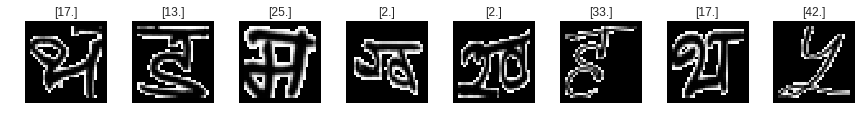

In [5]:
"""
Visualizing images with their Class Names

"""
%matplotlib inline
import matplotlib.pyplot as plt      # importing matplotlib libs
cols = 8
rows = 1
fig = plt.figure(figsize=(2 * cols - 1, 2.5 * rows - 1))  # setting figsize
for i in range(cols):
    for j in range(rows):
        random_index = np.random.randint(0, 13800)       # getting random images index from test data
        ax = fig.add_subplot(rows, cols, i * rows + j + 1)
        ax.grid('off')
        ax.axis('off')
        ax.imshow(x_test[random_index])                 #plottting images
        ax.set_title(y_test[random_index])                          # plotting title
plt.show()

In [0]:

# normalize inputs arrays
x_train2 = x_train/255-0.5
x_test2 = x_test/255-0.5

In [0]:
# converting Class Names into integers
y_train=y_train.astype(int)
y_test = y_test.astype(int)

In [0]:
# one-hot encoding the Class-Names
No_class = 47
y_train2 = np.eye(No_class)[(y_train[:,0])]
y_test2 = np.eye(No_class)[(y_test[:,0])]

In [9]:
# verifying the sizes
y_train2.shape,x_train2.shape

((78200, 47), (78200, 32, 32, 3))

In [10]:
# import necessary building blocks
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout
from keras.layers.advanced_activations import LeakyReLU

Using TensorFlow backend.


In [0]:
# defining function of model
def basic_model():
    
    model = Sequential()

    model.add(Conv2D(16, (3, 3), input_shape=(32,32,3), padding="same"))
    model.add(LeakyReLU(0.1))
    model.add(Conv2D(32, (3, 3), padding="same"))
    model.add(LeakyReLU(0.1))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    model.add(Conv2D(32, (3, 3), padding="same"))
    model.add(LeakyReLU(0.1))
    model.add(Conv2D(64, (3, 3), padding="same"))
    model.add(LeakyReLU(0.1))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Flatten())
    model.add(Dense(256))
    model.add(LeakyReLU(0.1))
    model.add(Dropout(0.5))
    model.add(Dense(47))
    model.add(Activation("softmax"))
    
    return model

In [0]:
import tensorflow as tf
import keras
from keras import backend as K

In [13]:
K.clear_session()  # clear default graph
model = basic_model()
model.summary()    # summary of the model

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 16)        448       
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 32, 32, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 32)        4640      
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 32)        9248      
__________

In [0]:
import tensorflow

In [15]:
init_LR = 5e-3  # initial learning rate of model
BATCH_SIZE = 25
EPOCHS = 25

K.clear_session()  # clear default graph

model = basic_model()  # define our model declared above

# prepare model for fitting (loss, optimizer, etc)
model.compile(
    loss='categorical_crossentropy',  # we train 46-way classification
    optimizer=keras.optimizers.Adamax(lr=init_LR),  # for SGD
    metrics=['accuracy']  # report accuracy during training
)

# scheduler of learning rate (decay with epochs)
def lr_scheduler(epoch):
    return init_LR * 0.9 ** epoch

# callback for printing of actual learning rate used by optimizer
class LrHistory(keras.callbacks.Callback):
    def on_epoch_begin(self, epoch, logs={}):
        print("Learning rate:", K.get_value(model.optimizer.lr))

# fit model
model.fit(
    x_train2, y_train2,  # prepared data
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    callbacks=[keras.callbacks.LearningRateScheduler(lr_scheduler), LrHistory()],
    validation_data=(x_test2, y_test2),
    shuffle=True,
)

Train on 78200 samples, validate on 13800 samples
Epoch 1/25
Learning rate: 0.005
78200/78200 [==============================] - 47s 606us/step - loss: 0.5389 - acc: 0.8453 - val_loss: 0.1074 - val_acc: 0.9673
Epoch 2/25
Learning rate: 0.0045
78200/78200 [==============================] - 43s 547us/step - loss: 0.1610 - acc: 0.9503 - val_loss: 0.0642 - val_acc: 0.9811
Epoch 3/25
Learning rate: 0.00405
78200/78200 [==============================] - 43s 547us/step - loss: 0.1131 - acc: 0.9653 - val_loss: 0.0537 - val_acc: 0.9843
Epoch 4/25
Learning rate: 0.003645
78200/78200 [==============================] - 43s 544us/step - loss: 0.0882 - acc: 0.9731 - val_loss: 0.0511 - val_acc: 0.9853
Epoch 5/25
Learning rate: 0.0032805
78200/78200 [==============================] - 43s 545us/step - loss: 0.0706 - acc: 0.9784 - val_loss: 0.0438 - val_acc: 0.9870
Epoch 6/25
Learning rate: 0.00295245
78200/78200 [==============================] - 43s 547us/step - loss: 0.0636 - acc: 0.9804 - val_loss: 

In [0]:
# saving model weights
model.save_weights('/content/drive/My Drive/devnagari/weights1.h5')

In [0]:
# Validating the model using sklearn metrices
y_pred_test = model.predict_proba(x_test2)
y_pred_test_classes = np.argmax(y_pred_test, axis=1)
y_pred_test_max_probas = np.max(y_pred_test, axis=1)
from sklearn.metrics import confusion_matrix, accuracy_score
acc = accuracy_score(y_test, y_pred_test_classes)

In [17]:
acc

0.9921014492753624

    100% |████████████████████████████████| 63.0MB 406kB/s 
    100% |████████████████████████████████| 13.9MB 3.4MB/s 
    100% |████████████████████████████████| 307kB 18.1MB/s 
    100% |████████████████████████████████| 3.0MB 9.6MB/s 
    100% |████████████████████████████████| 573kB 17.9MB/s 
keras 2.2.2 has requirement keras-applications==1.0.4, but you'll have keras-applications 1.0.6 which is incompatible.
keras 2.2.2 has requirement keras-preprocessing==1.0.2, but you'll have keras-preprocessing 1.0.5 which is incompatible.
  Found existing installation: numpy 1.14.6
    Uninstalling numpy-1.14.6:
      Successfully uninstalled numpy-1.14.6
  Found existing installation: tensorboard 1.12.0
    Uninstalling tensorboard-1.12.0:
      Successfully uninstalled tensorboard-1.12.0
  Found existing installation: setuptools 40.5.0
    Uninstalling setuptools-40.5.0:
      Successfully uninstalled setuptools-40.5.0
  Found existing installation: tensorflow 1.12.0
    Uninstalling tenso

In [0]:
# saving the model
from keras.models import load_model
model.save( '/content/drive/My Drive/devnagari/my_modaldev.h5')

In [0]:
del model 

In [0]:
#Converting the keras model into tesorflowjs and saving in dvng_m folder which contains the model.json file
tfjs.converters.save_keras_model(model, '/content/drive/My Drive/devnagari/dvng_m/')

ModuleNotFoundError: ignored

In [0]:
features = []
from keras.preprocessing import image
from keras.models import Model
from keras.models import model_from_json
from keras.layers import Input
from keras.applications.inception_v3 import InceptionV3, preprocess_input
model = InceptionV3(include_top=False, weights='imagenet', input_tensor=Input(shape=(100,100,3)))


In [0]:
import scipy
from scipy import misc
import os
#model_1 = Model(input=model.input)
#x = np.array([scipy.misc.imresize(x_train[i], (139, 139, 3)) 
                            #for i in range(0, len(x_train))]).astype('float32')
for i in range(0,78200): 
    x = scipy.misc.imresize(x_train[i], (100, 100, 3))
    x1 = np.expand_dims(x, axis=0)
    x2 = preprocess_input(x1)
    feature = model.predict(x2)
    flat = feature.flatten()
    features.append(flat)

/usr/local/lib/python3.6/dist-packages/scipy/misc/pilutil.py:482: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if issubdtype(ts, int):
/usr/local/lib/python3.6/dist-packages/scipy/misc/pilutil.py:485: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif issubdtype(type(size), float):


In [0]:
len(features)

78202

In [0]:
with h5py.File('/content/drive/My Drive/devnagari/dataset_train1.hdf5', 'w') as hdf5_file:

     hdf5_file.create_dataset('dataset_1', data=np.array(features))

In [0]:
features_test = []
for i in range(0,13800): 
    x_t = scipy.misc.imresize(x_test[i], (100, 100, 3))
    x_t1 = np.expand_dims(x_t, axis=0)
    x_t2 = preprocess_input(x_t1)
    feature_t = model.predict(x_t2)
    flat_t = feature_t.flatten()
    features_test.append(flat_t)

/usr/local/lib/python3.6/dist-packages/scipy/misc/pilutil.py:482: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if issubdtype(ts, int):
/usr/local/lib/python3.6/dist-packages/scipy/misc/pilutil.py:485: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif issubdtype(type(size), float):


In [0]:
with h5py.File('/content/drive/My Drive/devnagari/dataset_test1.hdf5', 'w') as hdf5_file:

     hdf5_file.create_dataset('dataset_test1', data=np.array(features_test))

In [0]:
with h5py.File('/content/drive/My Drive/devnagari/dataset_train1.hdf5', 'r') as hdf5_file:
     c = hdf5_file['dataset_1']
     c1 = c[:]
     

In [0]:
with h5py.File('/content/drive/My Drive/devnagari/dataset_test1.hdf5', 'r') as hdf5_file:
     d = hdf5_file['dataset_test1']
     d1 = d[:]

In [0]:
c2 = c1[2:78202]

In [0]:
c3 = c2.flatten()

In [0]:
c4 = y_train.flatten()

numpy.ndarray

In [0]:
from sklearn import preprocessing
X_normalized = preprocessing.normalize(c2, norm='l2')

In [0]:
from scipy.sparse import csr_matrix
sparse_dataset = csr_matrix(X_normalized)

In [0]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression().fit(X_normalized, c4)


numpy.ndarray

In [0]:
from sklearn.metrics import confusion_matrix, accuracy_score
lr_predicted = lr.predict(d1)
a_c = accuracy_score(y_test, lr_predicted)

In [0]:
a_c

0.6543478260869565